In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import sys, os
import warnings
import numpy as np
import importlib
import tools 

In [112]:
arquivo1 = '.\\Simulation Files\\20-Jun-2025 08.53.24.csv' #"comment 1" data
arquivo2 = '.\\Simulation Files\\20-Jun-2025 08.58.52.csv' #"comment 2" data
arquivo3 = '.\\Simulation Files\\20-Jun-2025 10.01.20.csv' #"comment 3" data file
arquivo4 = '.\\Simulation Files\\18-Jun-2025 16.55.49.csv'#astrid MZI2 file (to see the grating loss) https://qdot-nexus.phas.ubc.ca:25683/apps/onlyoffice/s/tBoG5bK5aPs3yTY?fileId=158011224


arquivo = [arquivo1, arquivo2, arquivo3,arquivo4]

## Reading the data files and creating DataFrames

In [157]:
for i in range(0,len(arquivo),1):
    with open(arquivo[i], 'r') as f:
        for linha in f:
            if linha.startswith('wavelength,'):
                wavelengths = [float(v) for v in linha.strip().split(',')[1:]]
            elif linha.startswith('channel_1,'):
                channel_1 = [float(v) for v in linha.strip().split(',')[1:]]
            elif linha.startswith('channel_2,'):
                channel_2 = [float(v) for v in linha.strip().split(',')[1:]]
            elif linha.startswith('channel_3,'):
                channel_3 = [float(v) for v in linha.strip().split(',')[1:]]
    
    if i == 0:
        df1 = pd.DataFrame({
        'wavelength': wavelengths,
        'channel_1': channel_1,
        'channel_2': channel_2,
        'channel_3': channel_3
            })
    elif i == 1:
        df2 = pd.DataFrame({
        'wavelength': wavelengths,
        'channel_1': channel_1,
        'channel_2': channel_2,
        'channel_3': channel_3
        })
    elif i == 2:
        df3 = pd.DataFrame({
        'wavelength': wavelengths,
        'channel_1': channel_1,
        'channel_2': channel_2,
        'channel_3': channel_3
        })
    elif i == 3:
        df4 = pd.DataFrame({
        'wavelength': wavelengths,
        'channel_1': channel_1,
        'channel_2': channel_2,
        'channel_3': channel_3
        })

## Plotting the spectra of graing couplers loss

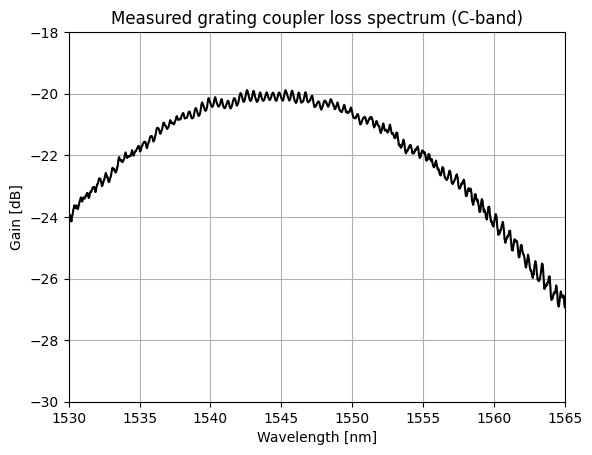

In [114]:
plt.plot(df4['wavelength'],df4['channel_2'], color='black')
plt.xlim(1530,1565)
plt.ylim(-30,-18)
plt.grid()
plt.xlabel('Wavelength [nm]')
plt.ylabel('Gain [dB]')
plt.title('Measured grating coupler loss spectrum (C-band)')
plt.savefig('.\\Images\\Grating coupler loss spectrum measured')

## Plotting the simulated spectrum from klayout imported circuit (without grating coupler compensation )

In [115]:
sys.path.append('C:\\Program Files\\Lumerical\\v242\\api\\python')
sys.path.append('C:\\Program Files\\Lumerical\\v242\\api\\python\\lumapi.py')
warnings.filterwarnings("ignore", category=SyntaxWarning)
import lumapi
icApi = lumapi.INTERCONNECT()

In [116]:
#units
nm = 1e-9
um = 1e-6

## Out 123

In [117]:
icApi.load('.\\Simulation Files\\Circuit_Out123.icp')
icApi.run()

In [118]:
data1 = icApi.getresult(f'ONA_1', f'input 1/mode 1/gain')
data2 = icApi.getresult(f'ONA_1', f'input 2/mode 1/gain')
data3 = icApi.getresult(f'ONA_1', f'input 3/mode 1/gain')

In [119]:
#se não fechar o software, a api não consegue carregar o .icp dos outros circuitos, embora seja possível carrega-los manualmente 
icApi.close()

## Out 456

In [120]:
icApi = lumapi.INTERCONNECT()
icApi.load('.\\Simulation Files\\Circuit_Out456.icp')

In [121]:
icApi.run()

In [122]:
data4 = icApi.getresult(f'ONA_1', f'input 1/mode 1/gain')
data5 = icApi.getresult(f'ONA_1', f'input 2/mode 1/gain')
data6 = icApi.getresult(f'ONA_1', f'input 3/mode 1/gain')

In [123]:
icApi.close()

## Out 781 

In [124]:
icApi = lumapi.INTERCONNECT()
icApi.load('.\\Simulation Files\\Circuit_Out781.icp')

In [125]:
icApi.run()

In [126]:
data7 = icApi.getresult(f'ONA_1', f'input 1/mode 1/gain')
data8 = icApi.getresult(f'ONA_1', f'input 2/mode 1/gain')
data9 = icApi.getresult(f'ONA_1', f'input 3/mode 1/gain')

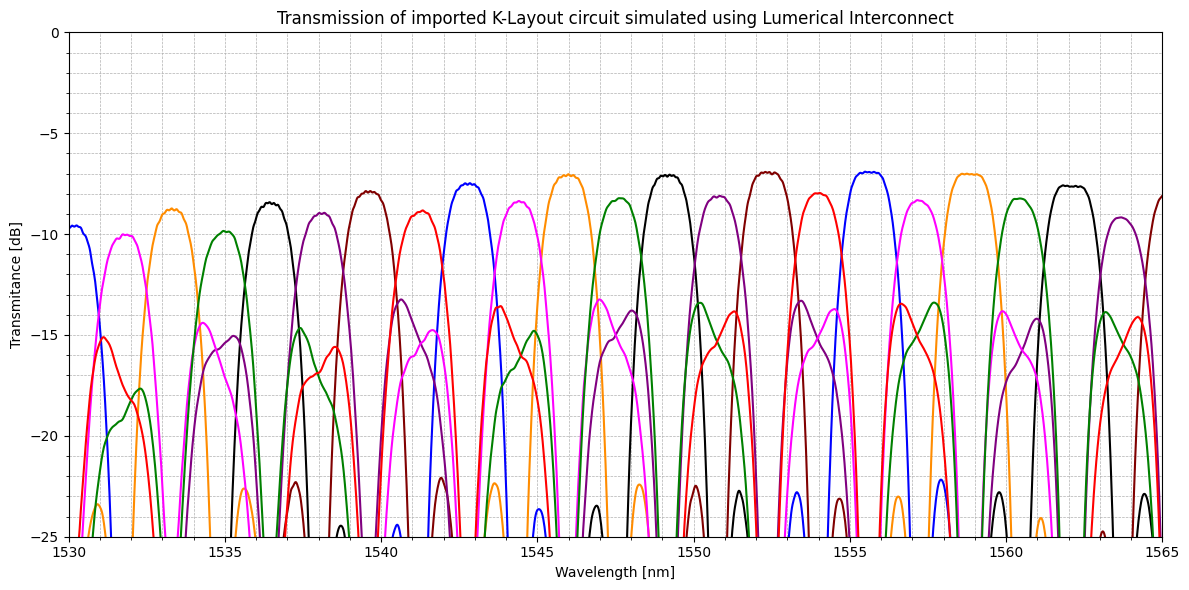

In [127]:
plt.figure(figsize=(12,6))
plt.plot(data1['wavelength']/nm, data1['TE gain (dB)'] ,color='blue') #ok
plt.plot(data2['wavelength']/nm, data2['TE gain (dB)'] , color='maroon') #ok
plt.plot(data3['wavelength']/nm, data3['TE gain (dB)'] , color='black')#ok
plt.plot(data4['wavelength']/nm, data4['TE gain (dB)'], color='darkorange') #ok
plt.plot(data5['wavelength']/nm, data5['TE gain (dB)'], color='purple')#not ok
plt.plot(data6['wavelength']/nm, data6['TE gain (dB)'], color='magenta') #not ok
#plt.plot(data7['wavelength']/nm, data7['TE gain (dB)'], color='pink', linestyle='--') # repeated
plt.plot(data8['wavelength']/nm, data8['TE gain (dB)'], color='green') #not ok
plt.plot(data9['wavelength']/nm, data9['TE gain (dB)'], color='red') #not ok
plt.xlim(1530, 1565)
plt.grid()
plt.ylim(-25, 0)
plt.xlabel('Wavelength [nm]')
plt.ylabel('Transmitance [dB]')
plt.minorticks_on()
plt.title('Transmission of imported K-Layout circuit simulated using Lumerical Interconnect')
plt.tight_layout()
plt.grid(which='both', axis='both', linestyle='--', linewidth=0.5)
ax = plt.gca()
#ax.set_facecolor('papayawhip')
plt.savefig('.\\Images\\Simulation without grating coupler compensation')

## Plotting the measured results (without grating coupler compensation)

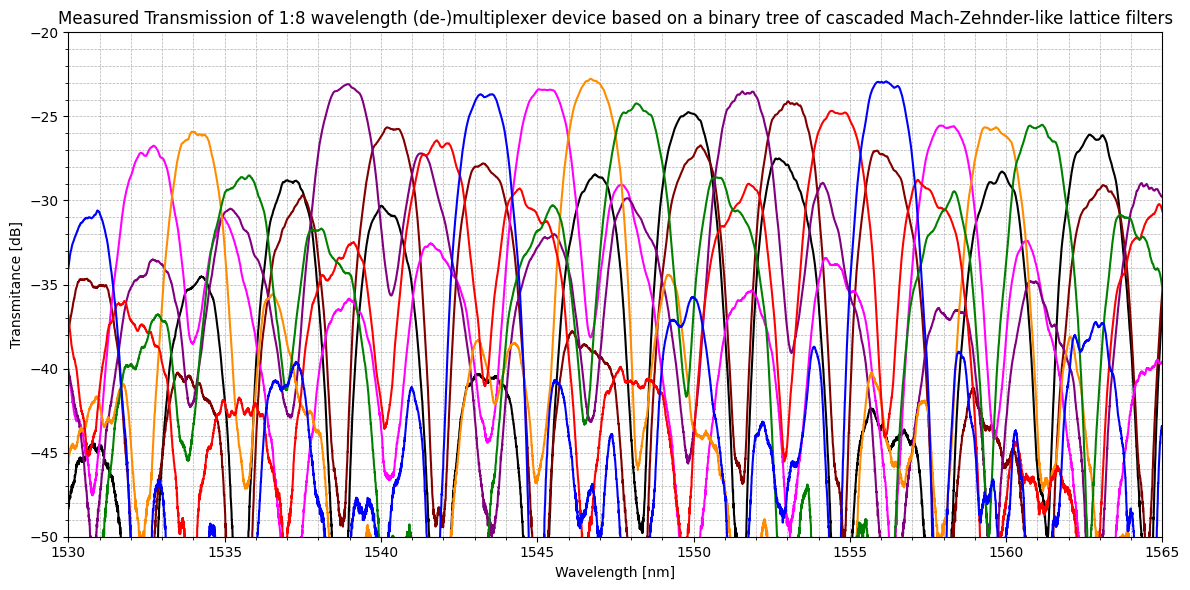

In [160]:
plt.figure(figsize=(12,6))
#plt.figure(facecolor='papayawhip')
plt.plot(df1['wavelength'],df1['channel_1'] , color='black')
plt.plot(df1['wavelength'],df1['channel_2'] ,color='maroon')
#plt.plot(df1['wavelength'],df1['channel_3'] - df4['channel_2'], color='blue') # repeated

plt.plot(df2['wavelength'],df2['channel_1'] , color='magenta')
plt.plot(df2['wavelength'],df2['channel_2'], color='purple')
plt.plot(df2['wavelength'],df2['channel_3'], color='darkorange')
#out 123
plt.plot(df3['wavelength'],df3['channel_1'] , color='red')
plt.plot(df3['wavelength'],df3['channel_2'] , color='green')
plt.plot(df3['wavelength'],df3['channel_3'] , color = 'blue')
plt.grid()
plt.title(rf'Measured Transmission of 1:8 wavelength (de-)multiplexer device based on a binary tree of cascaded Mach-Zehnder-like lattice filters')
plt.ylim(-50,-20)
plt.xlim(1530,1565)
plt.xlabel('Wavelength [nm]')
plt.ylabel('Transmitance [dB]')
plt.minorticks_on()
plt.tight_layout()
plt.grid(which='both', axis='both', linestyle='--', linewidth=0.5)
ax = plt.gca()
#ax.set_facecolor('papayawhip')
plt.savefig('.\\Images\\Measured results')

## Plotting the measured results (with grating coupler compensation)

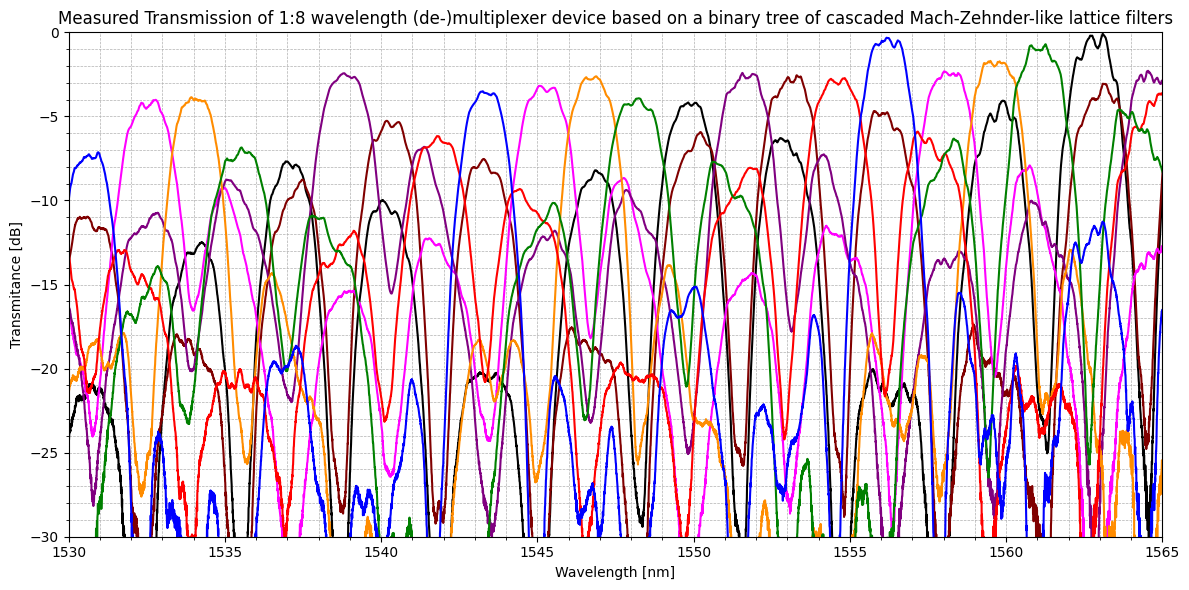

In [167]:
plt.figure(figsize=(12,6))
#plt.figure(facecolor='papayawhip')
plt.plot(df1['wavelength'],df1['channel_1'] - df4['channel_2'], color='black')
plt.plot(df1['wavelength'],df1['channel_2'] - df4['channel_2'],color='maroon')
#plt.plot(df1['wavelength'],df1['channel_3'] - df4['channel_2'], color='blue') # repeated

plt.plot(df2['wavelength'],df2['channel_1'] - df4['channel_2'], color='magenta')
plt.plot(df2['wavelength'],df2['channel_2'] - df4['channel_2'], color='purple')
plt.plot(df2['wavelength'],df2['channel_3'] - df4['channel_2'], color='darkorange')
#out 123
plt.plot(df3['wavelength'],df3['channel_1'] - df4['channel_2'], color='red')
plt.plot(df3['wavelength'],df3['channel_2'] - df4['channel_2'], color='green')
plt.plot(df3['wavelength'],df3['channel_3'] - df4['channel_2'], color = 'blue')
plt.grid()
plt.title(rf'Measured Transmission of 1:8 wavelength (de-)multiplexer device based on a binary tree of cascaded Mach-Zehnder-like lattice filters')
plt.ylim(-30,0)
plt.xlim(1530,1565)
plt.xlabel('Wavelength [nm]')
plt.ylabel('Transmitance [dB]')
plt.minorticks_on()
plt.tight_layout()
plt.grid(which='both', axis='both', linestyle='--', linewidth=0.5)
ax = plt.gca()
#ax.set_facecolor('papayawhip')
plt.savefig('.\\Images\\Measured results with compensation')

In [129]:
icApi.close()

## Getting the grating coupler loss from interconnect to also compensate the simulated circuit

In [145]:
icApi = lumapi.INTERCONNECT()

In [147]:
importlib.reload(tools)

<module 'tools' from 'C:\\Users\\luciv\\Documents\\Lucivaldo\\Photonics training\\March 2025 OpenEBL Results\\tools.py'>

In [148]:
icApi.switchtolayout()
icApi.deleteall()

In [149]:
tools.placeOna(icApi,'Ona1',0,0,1,5000,1500*nm, 1600*nm)

The required Optical Network Analyzer was placed successfully


In [150]:
icApi.addelement('ebeam_gc_te1550')
icApi.set('name','gc1')
icApi.addelement('ebeam_gc_te1550') 
icApi.set('name','gc2')
icApi.addelement('ebeam_wg_strip_1550')
icApi.set('name','wg1')

In [151]:
icApi.connect('gc1','opt_fiber', 'Ona1', 'output')
icApi.connect('gc1','opt_wg', 'wg1', 'opt_1')
icApi.connect('gc2','opt_wg', 'wg1', 'opt_2')
icApi.connect('gc2','opt_fiber', 'Ona1', 'input 1')

1.0

In [152]:
icApi.run()

In [153]:
gc_loss=  icApi.getresult('Ona1', 'input 1/mode 1/gain')

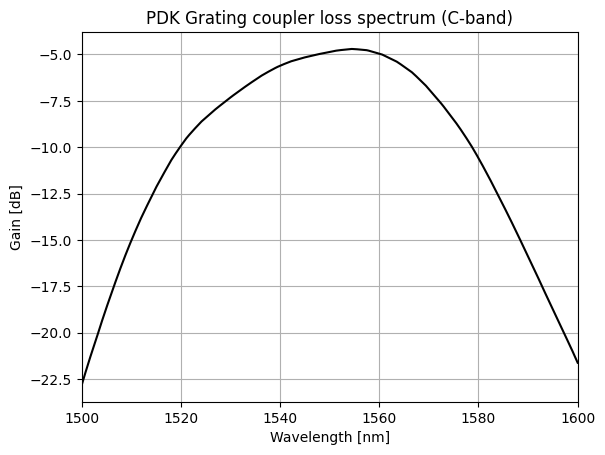

In [154]:
plt.plot(gc_loss['wavelength']/nm, gc_loss['TE gain (dB)'], color='black')
plt.grid()
plt.title('PDK Grating coupler loss spectrum (C-band)')
plt.xlim(1500,1600)
#plt.ylim(-10,-2)
plt.xlabel('Wavelength [nm]')
plt.ylabel('Gain [dB]')
plt.savefig('.\\Images\\Grating coupler loss spectrum PDK device')

## Plotting the simulated spectrum using PDK devices from klayout imported circuit (with grating coupler compensation ) 

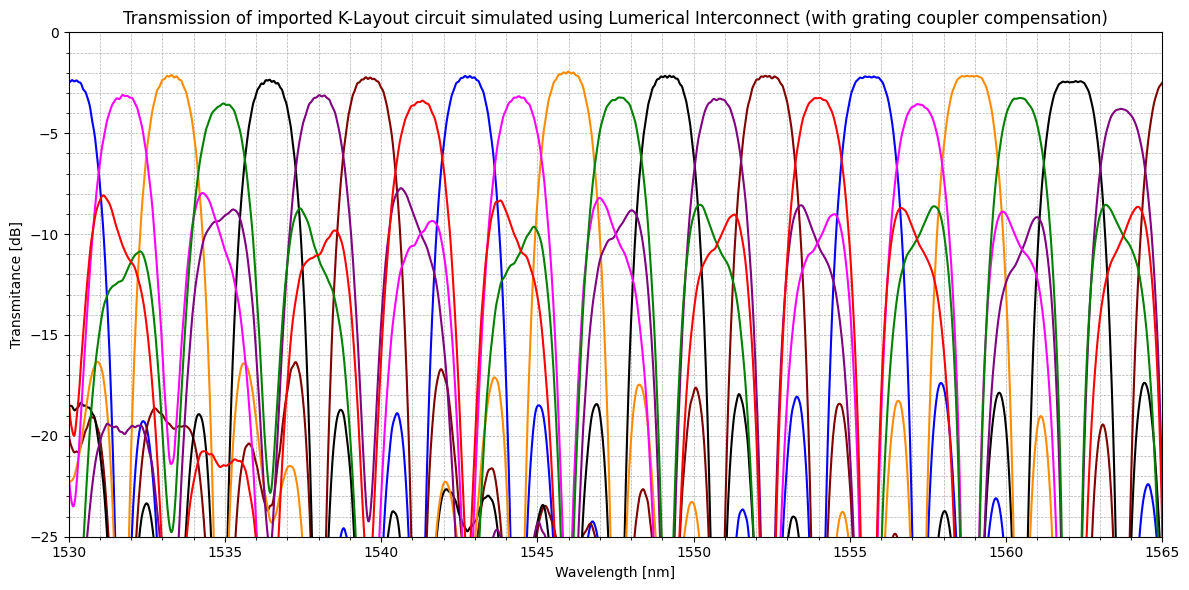

In [140]:
plt.figure(figsize=(12,6))
plt.plot(data1['wavelength']/nm, data1['TE gain (dB)'] - gc_loss['TE gain (dB)'],color='blue') #ok
plt.plot(data2['wavelength']/nm, data2['TE gain (dB)'] - gc_loss['TE gain (dB)'] , color='maroon') #ok
plt.plot(data3['wavelength']/nm, data3['TE gain (dB)'] - gc_loss['TE gain (dB)'] , color='black')#ok
plt.plot(data4['wavelength']/nm, data4['TE gain (dB)'] - gc_loss['TE gain (dB)'] , color='darkorange') #ok
plt.plot(data5['wavelength']/nm, data5['TE gain (dB)'] - gc_loss['TE gain (dB)'] , color='purple')#not ok
plt.plot(data6['wavelength']/nm, data6['TE gain (dB)'] - gc_loss['TE gain (dB)'] , color='magenta') #not ok
#plt.plot(data7['wavelength']/nm, data7['TE gain (dB)'], color='pink', linestyle='--') # repeated
plt.plot(data8['wavelength']/nm, data8['TE gain (dB)'] - gc_loss['TE gain (dB)'] , color='green') #not ok
plt.plot(data9['wavelength']/nm, data9['TE gain (dB)'] - gc_loss['TE gain (dB)'] , color='red') #not ok
plt.xlim(1530, 1565)
plt.grid()
plt.ylim(-25, 0)
plt.xlabel('Wavelength [nm]')
plt.ylabel('Transmitance [dB]')
plt.minorticks_on()
plt.title('Transmission of imported K-Layout circuit simulated using Lumerical Interconnect (with grating coupler compensation)')
plt.tight_layout()
plt.grid(which='both', axis='both', linestyle='--', linewidth=0.5)
ax = plt.gca()
#ax.set_facecolor('papayawhip')
plt.savefig('.\\Images\\Simulation with grating coupler compensation')

#  Plotting the measured results (with grating coupler compensation)

## out 123

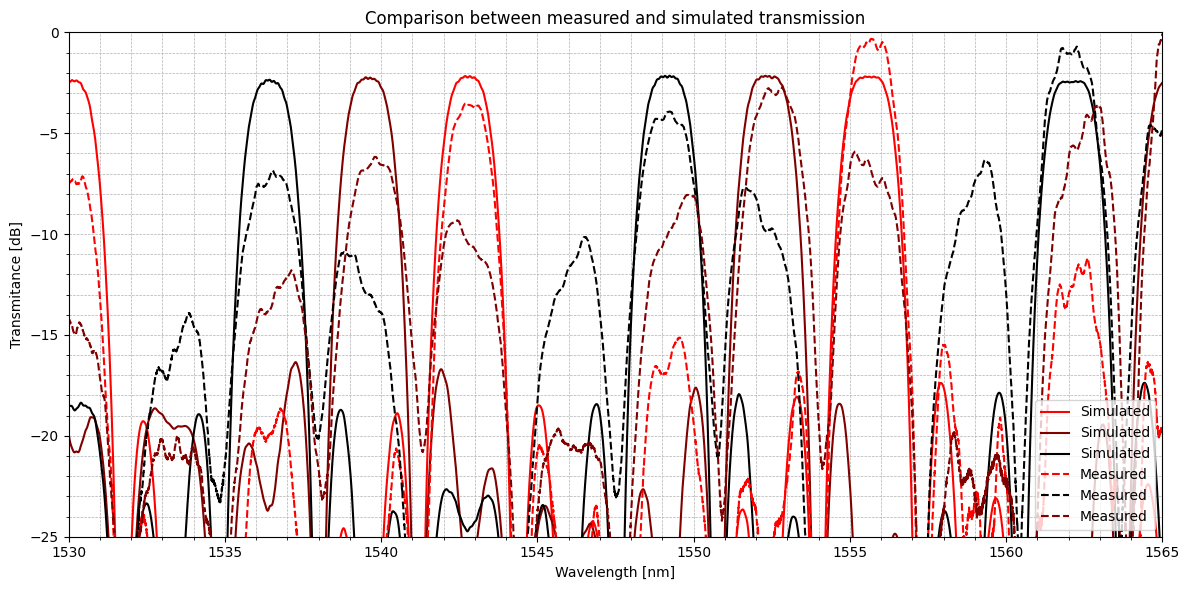

In [172]:
plt.figure(figsize=(12,6))

#simulation plot
plt.plot(data1['wavelength']/nm, data1['TE gain (dB)'] - gc_loss['TE gain (dB)'],color='red', label='Simulated') #ok
plt.plot(data2['wavelength']/nm, data2['TE gain (dB)'] - gc_loss['TE gain (dB)'] , color='maroon', label='Simulated') #ok
plt.plot(data3['wavelength']/nm, data3['TE gain (dB)'] - gc_loss['TE gain (dB)'] , color='black', label='Simulated')#ok

#measured plot
plt.plot(df3['wavelength']-0.5,df3['channel_3']- df4['channel_2'], color='red', linestyle='--', label='Measured')
plt.plot(df3['wavelength']+1,df3['channel_2']- df4['channel_2'], color='black', linestyle='--', label='Measured')
plt.plot(df3['wavelength']-2, df3['channel_1']- df4['channel_2'], color='maroon', linestyle='--', label='Measured')

plt.grid()
plt.title(rf'Comparison between measured and simulated transmission')
plt.ylim(-25,0)
plt.xlim(1530,1565)
plt.xlabel('Wavelength [nm]')
plt.ylabel('Transmitance [dB]')
plt.minorticks_on()
plt.legend(loc='lower right')
plt.tight_layout()
plt.grid(which='both', axis='both', linestyle='--', linewidth=0.5)
ax = plt.gca()
#ax.set_facecolor('papayawhip')
plt.savefig('.\\Images\\comparison out 123')

## out 456

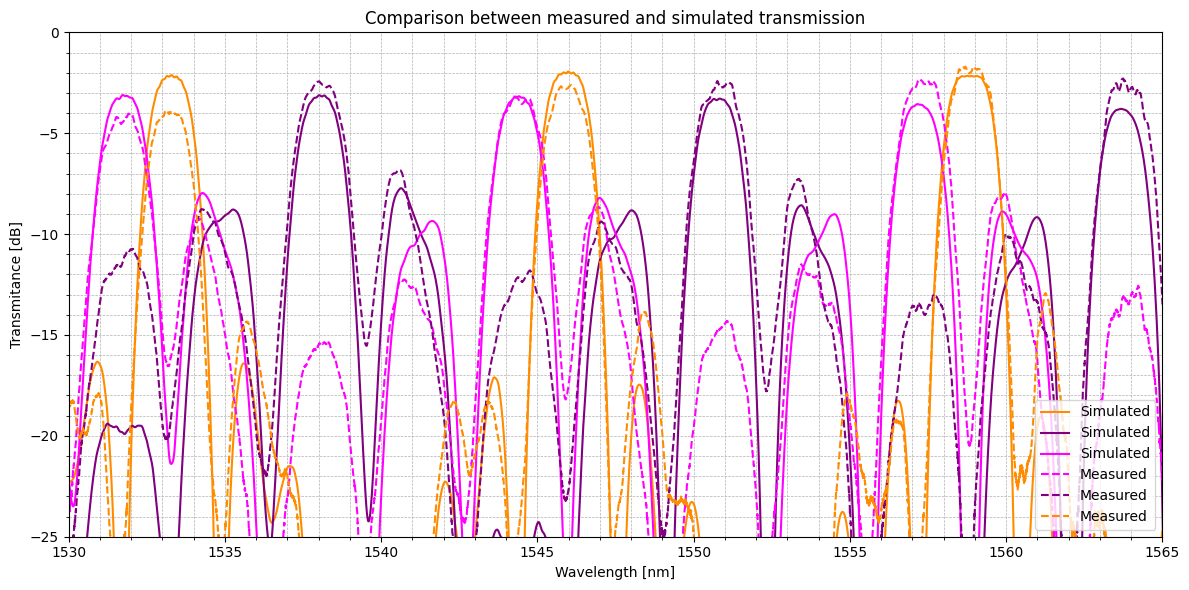

In [173]:
plt.figure(figsize=(12, 6))

plt.plot(data4['wavelength'] / nm, data4['TE gain (dB)'] - gc_loss['TE gain (dB)'], color='darkorange', label='Simulated')  #ok
plt.plot(data5['wavelength'] / nm, data5['TE gain (dB)'] - gc_loss['TE gain (dB)'], color='purple', label='Simulated')  #not ok
plt.plot(data6['wavelength'] / nm, data6['TE gain (dB)'] - gc_loss['TE gain (dB)'], color='magenta', label='Simulated')  #not ok


plt.plot(df2['wavelength']-0.8,df2['channel_1'] - df4['channel_2'], color='magenta', linestyle='--', label='Measured')
plt.plot(df2['wavelength']-0.8,df2['channel_2'] - df4['channel_2'], color='purple', linestyle='--', label='Measured')
plt.plot(df2['wavelength']-0.8,df2['channel_3'] - df4['channel_2'], color='darkorange', linestyle='--', label='Measured')
plt.xlim(1530, 1565)
plt.grid()
plt.ylim(-25, 0)
plt.xlabel('Wavelength [nm]')
plt.ylabel('Transmitance [dB]')
plt.minorticks_on()
plt.title('Comparison between measured and simulated transmission')
plt.tight_layout()
plt.grid(which='both', axis='both', linestyle='--', linewidth=0.5)
ax = plt.gca()
#ax.set_facecolor('papayawhip')
plt.legend(loc='lower right')
plt.savefig('.\\Images\\comparison out 456')

## out 781

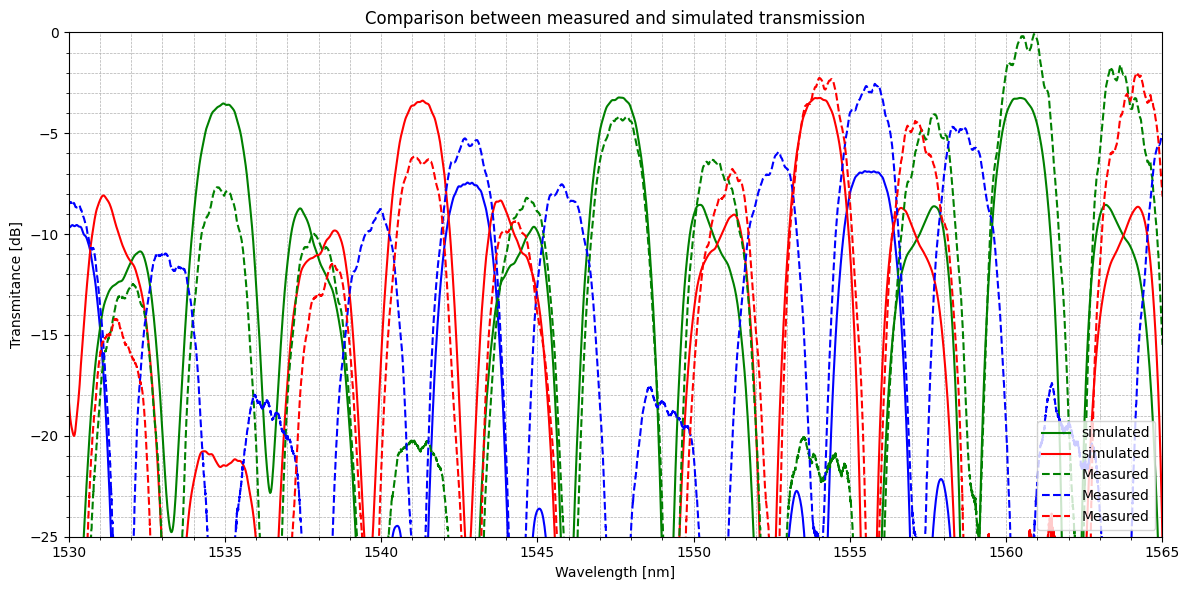

In [183]:
plt.figure(figsize=(12,6))

plt.plot(data7['wavelength']/nm, data7['TE gain (dB)'], - gc_loss['TE gain (dB)'] , color='blue')
plt.plot(data8['wavelength']/nm, data8['TE gain (dB)'] - gc_loss['TE gain (dB)'] , color='green', label='simulated') #not ok
plt.plot(data9['wavelength']/nm, data9['TE gain (dB)'] - gc_loss['TE gain (dB)'] , color='red', label='simulated') #not ok

plt.plot(df3['wavelength']-2.2, df1['channel_1']- df4['channel_2'], color='green', linestyle='--', label='Measured')
plt.plot(df3['wavelength']+2.5, df1['channel_2']- df4['channel_2'], color='blue', linestyle='--', label='Measured')
plt.plot(df3['wavelength']-2.2, df1['channel_3']- df4['channel_2'], color='red', linestyle='--', label='Measured') #ok

plt.xlim(1530, 1565)
plt.grid()
plt.ylim(-25, 0)
plt.xlabel('Wavelength [nm]')
plt.ylabel('Transmitance [dB]')
plt.minorticks_on()
plt.title('Comparison between measured and simulated transmission')
plt.grid(which='both', axis='both', linestyle='--', linewidth=0.5)
ax = plt.gca()
#ax.set_facecolor('papayawhip')
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig('.\\Images\\comparison out 781')

In [144]:
icApi.close()